In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv("stockprize.csv")

In [29]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [30]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1004,1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [31]:
df.drop(columns=["Date","Adj Close"],axis=1,inplace=True)

In [32]:
df

,Unnamed: 0,Open,High,Low,Close,Volume
0,0,262.000000,267.899994,250.029999,254.259995,11896100
1,1,247.699997,266.700012,245.000000,265.720001,12595800
2,2,266.579987,272.450012,264.329987,264.559998,8981500
3,3,267.079987,267.619995,250.000000,250.100006,9306700
4,4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,1007,421.440002,429.260010,404.279999,405.600006,9905200


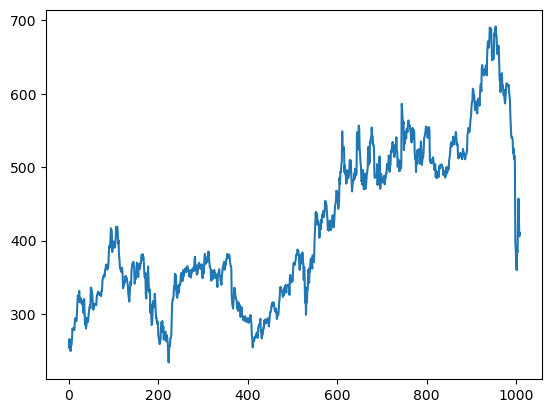

In [33]:
plt.plot(df.Close)

In [34]:
#moving average for 100 days.
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    600.807798
1005    599.403698
1006    597.711299
1007    595.874399
1008    594.198499
Name: Close, Length: 1009, dtype: float64

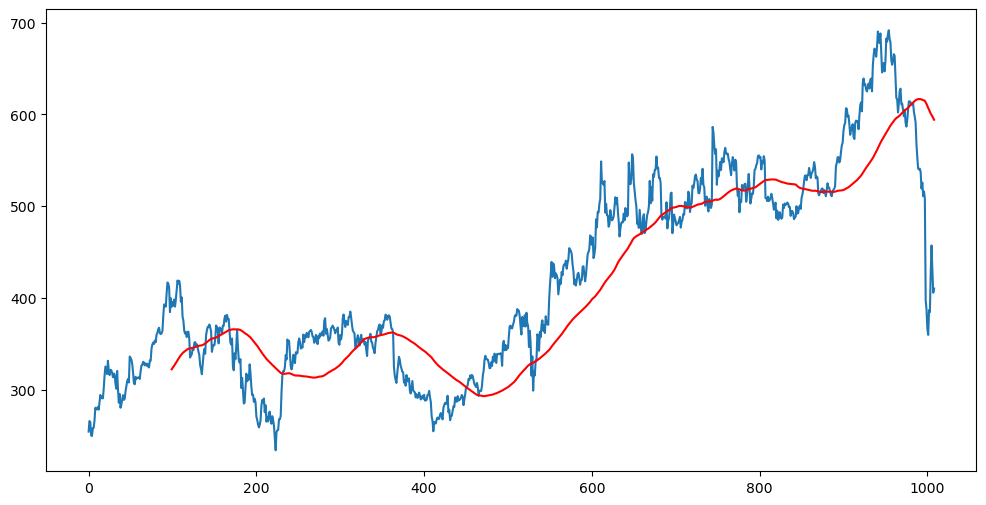

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [36]:
#moving average for 200 days.
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    560.237698
1005    559.751148
1006    559.150698
1007    558.634198
1008    558.141148
Name: Close, Length: 1009, dtype: float64

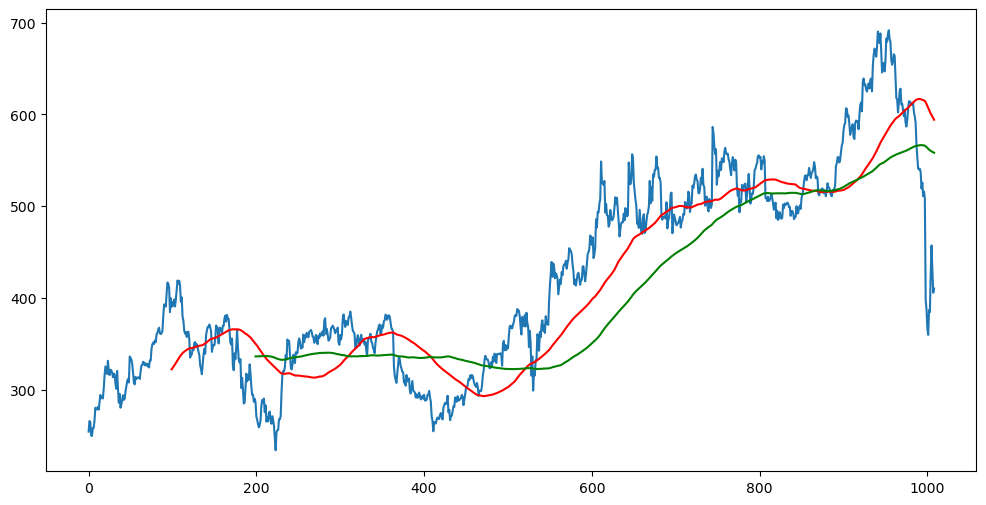

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [38]:
df.shape

(1009, 6)

In [39]:
#splitting the data into training and testing.

data_training =pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [41]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [42]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train) ,np.array(y_train)

In [43]:
#ML model.

In [49]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [46]:
import keras as ks

In [47]:
import tensorflow as tf

In [51]:
model=Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [52]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
19/19 [==============================] - 26s 570ms/step - loss: 0.1081
Epoch 2/50
19/19 [==============================] - 13s 674ms/step - loss: 0.0223
Epoch 3/50
19/19 [==============================] - 18s 972ms/step - loss: 0.0174
Epoch 4/50
19/19 [==============================] - 11s 593ms/step - loss: 0.0178
Epoch 5/50
19/19 [==============================] - 11s 566ms/step - loss: 0.0173
Epoch 6/50
19/19 [==============================] - 10s 552ms/step - loss: 0.0147
Epoch 7/50
19/19 [==============================] - 11s 556ms/step - loss: 0.0148
Epoch 8/50
19/19 [==============================] - 10s 550ms/step - loss: 0.0143
Epoch 9/50
19/19 [==============================] - 11s 567ms/step - loss: 0.0139
Epoch 10/50
19/19 [==============================] - 11s 585ms/step - loss: 0.0132
Epoch 11/50
19/19 [==============================] - 10s 540ms/step - loss: 0.0125
Epoch 12/50
19/19 [==============================] - 10s 552ms/step - loss: 0.0115
Epoch 13/50
1

In [53]:
model.save('keras_model.h5')

In [54]:
data_testing.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [55]:
data_training.tail(100)

,Close
606,476.890015
607,493.809998
608,493.160004
609,502.779999
610,507.760010
...,...
701,479.100006
702,480.630005
703,481.790009
704,484.670013


In [56]:
past_100_days=data_training.tail(100)

In [57]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13436\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [58]:
final_df.head()

,Close
0,476.890015
1,493.809998
2,493.160004
3,502.779999
4,507.760010


In [59]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [60]:
input_data.shape

(403, 1)

In [62]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [63]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [64]:
#making predictions.
y_predicted=model.predict(x_test)

10/10 [==============================] - 6s 165ms/step


In [65]:
y_predicted.shape

(303, 1)

In [66]:
y_test

array([0.35217924, 0.37103526, 0.37742098, 0.39657814, 0.39459021,
       0.43639862, 0.43278411, 0.41513293, 0.41751255, 0.47013471,
       0.46073667, 0.4033254 , 0.42588629, 0.43230216, 0.49013517,
       0.48218326, 0.49739453, 0.52170251, 0.52637129, 0.50968392,
       0.50492488, 0.46621878, 0.46468256, 0.48019515, 0.51558778,
       0.49667165, 0.54528743, 0.49146052, 0.48525552, 0.42407899,
       0.44938103, 0.45392929, 0.41989216, 0.40528327, 0.44606766,
       0.42519346, 0.41651858, 0.42793452, 0.68267123, 0.66309233,
       0.61890412, 0.59363241, 0.60914481, 0.49272575, 0.53887156,
       0.52016629, 0.54019691, 0.5676676 , 0.54143199, 0.57971616,
       0.57558954, 0.56694472, 0.60053014, 0.61414507, 0.59607223,
       0.59284922, 0.59513848, 0.57724637, 0.56784832, 0.54375121,
       0.52435321, 0.56161335, 0.58348133, 0.56326999, 0.5396246 ,
       0.57513783, 0.56664358, 0.48495438, 0.45661014, 0.47197207,
       0.40251206, 0.44200125, 0.43627821, 0.49206299, 0.47688

In [67]:
y_predicted

array([[0.3535782 ],
       [0.34919044],
       [0.34561744],
       [0.34313777],
       [0.34227914],
       [0.34326103],
       [0.34682238],
       [0.35312682],
       [0.36132637],
       [0.37027472],
       [0.3799973 ],
       [0.3902351 ],
       [0.39920133],
       [0.4058491 ],
       [0.40987027],
       [0.4126964 ],
       [0.415484  ],
       [0.41920525],
       [0.42474484],
       [0.43235332],
       [0.4411872 ],
       [0.44996464],
       [0.45663148],
       [0.4598088 ],
       [0.4594461 ],
       [0.4569946 ],
       [0.4535355 ],
       [0.4510171 ],
       [0.4494987 ],
       [0.44844204],
       [0.445917  ],
       [0.441276  ],
       [0.4347954 ],
       [0.4264956 ],
       [0.4164744 ],
       [0.40612262],
       [0.3964347 ],
       [0.38798463],
       [0.38136935],
       [0.38187897],
       [0.39302367],
       [0.4145736 ],
       [0.44305342],
       [0.47424152],
       [0.50123435],
       [0.520418  ],
       [0.53025854],
       [0.531

In [68]:
scaler.scale_

array([0.00301214])

In [69]:
scale_factor=1/0.00301214
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

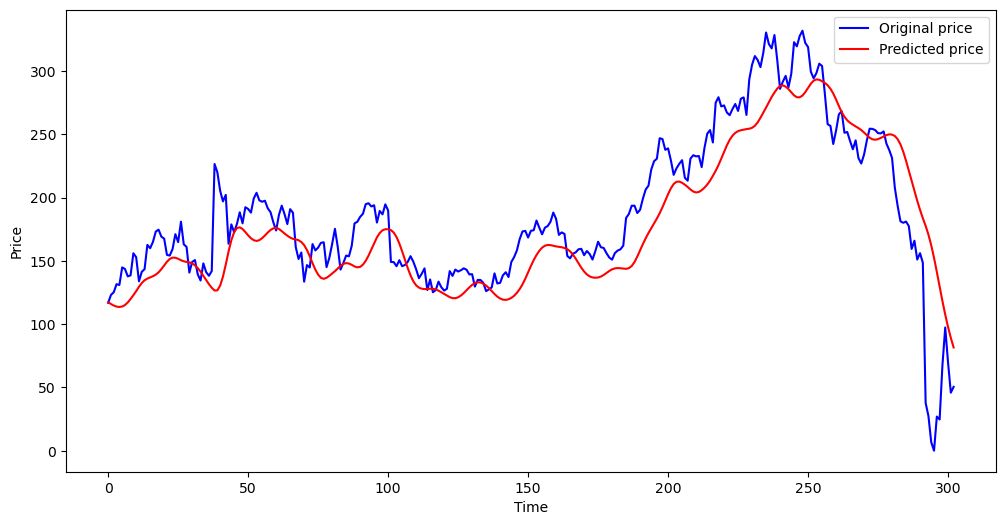

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()